# Classification

*Binary Classification*

Where the target is binary, "no" or "yes", "false" or "true", 0 or 1.

Commonly, the 0 class is called the "negative class", and the 1 class is called the "positive class"

## How to build a classification model?

Clearly linear regression is not the right way to approach the classification problems

For example if we add a data point waaay to the right of the graph, it may lead the linear regression line to go to the right and subsequently the _decision boundry_ to shift to the right as well, giving us a missfit.

# Logistic Regression
(Not actually regression)

__Logistic or the sigmoid function__
$$g(z) = \frac{1}{1+e^{-z}}$$

Now our function becomes of the type of a sigmoid function, which can be written as:-
$$f_{\vec{w}, b}(\vec{x}) = g(\vec{w} \cdot \vec{x} + b) = \frac{1}{1+e^{-(\vec{w} \cdot \vec{x} + b)}}$$

## How to interpret this ?

Outputting the probability that the class is 1

That is, if the model output's 0.7, then there is a 70% chance for this tumor

## Logistic Boundry

First we find the linear regression's w and b, and then we feed it to the sigmoid function which can be interpretted as $P(y = 1 | x; \vec{w}, b)$

__What if we want a 0 or 1?__ <br>
A common practice is to set a threshold to 0.5

By this we get, whenever $z = \vec{x} \cdot \vec{w} + b$, $z < 0$, we get the output as 0, and for $z > 0$ we get 1, and $z = 0$ is the Decision Boundry

## Cost function for logistic regression
## And why the squared error function is not a good choice

We will use $m$ for number of training examples and each example as $n$ features, and the target/output is either 0 or 1, given by sigmoid function

__Recall:__ That for a linear regression problem, the cost function is a bow shaped function with the squared error cost function

__However:__ For the sigmoid function, the cost squred error cost function becomes a non convex function, and thus gradient descent would not give the best output, and hence we used difference cost function

Let as of now the cost be,
$$J(\vec{w}, b) = \frac{1}{m}\sum_{i=1}^{m}\frac{1}{2}(f_{\vec{w}, b}(\vec{x}^{(i)})  - y^{(i)})^2$$

Now, we will define a new loss function as,
$$L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) = \frac{1}{2}(f_{\vec{w}, b}(\vec{x}^{(i)})  - y^{(i)})^2$$

Let The new Loss function be 
$$L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) = 
    \begin{cases}
        -log(f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if } y^{(i)} = 1\\
        -log(1-f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if } y^{(i)} = 0
    \end{cases}$$

## Simplified Loss and Cost Function

$$L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) = -y^{(i)}log(f_{\vec{w}, b}(\vec{x}^{(i)}))-(1-y^{(i)})log(1-f_{\vec{w}, b}(\vec{x}^{(i)}))$$

And Hence the Cost function becomes
$$J(\vec{w}, b) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(f_{\vec{w}, b}(\vec{x}^{(i)}))+(1-y^{(i)})log(1-f_{\vec{w}, b}(\vec{x}^{(i)}))]$$

Derived by using maximum likely hood priciple in statistics

## Gradient Descent Implementation

Miraculously the definition of the derivatives of the parameters come out to be the same, only that now, the definition of "f_wb" changes.

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

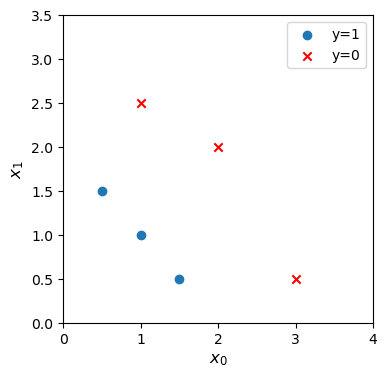

In [3]:
fig, axes = plt.subplots(1, 1, figsize = (4, 4))

axes.axis([0, 4, 0, 3.5])
axes.set_ylabel('$x_1$', fontsize=12)
axes.set_xlabel('$x_0$', fontsize=12)
axes.scatter(np.transpose(x_train)[0][:3], np.transpose(x_train)[1][:3], marker = 'o', label="y=1")
axes.scatter(np.transpose(x_train)[0][3:], np.transpose(x_train)[1][3:], marker = 'x', c='r', label = "y=0")
axes.legend()

In [4]:
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 6


In [5]:
i = 0

x_i = x_train[i]
y_i = y_train[i]
print("For example the first input feature and output feature is: ")
print(f"    (x^({i})), y^({i})) = ({x_i}, {y_i})")

For example the first input feature and output feature is: 
    (x^(0)), y^(0)) = ([0.5 1.5], 0)


Normalization of Features

In [6]:
# for input feature

temp = np.transpose(x_train)
for i in range(len(temp)):
    mu = np.mean(temp[i])
    temp[i] = (temp[i]-mu)/(np.max(temp[i])-np.min(temp[i]))
x_train = np.transpose(temp)

# for output feature

mu = np.mean(y_train)
y_train = (y_train-mu)/(np.max(y_train)-np.min(y_train))

In [7]:
w = np.array([0.1, -0.1])
b = 2.5
print("For example: ")
print(f"    w: {w}")
print(f"    b: {b}")

For example: 
    w: [ 0.1 -0.1]
    b: 2.5


In [8]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        temp = np.dot(w,x[i])+b
        f_wb[i] = 1/(1+np.exp(-temp))
    return f_wb

In [9]:
compute_model_output(x_train, w, b)

array([0.92068325, 0.92390781, 0.92701168, 0.93096877, 0.9232018 ,
       0.91846464])

In [10]:
def compute_cost_logistic(X, y, w, b):
    m = len(y)
    Loss = -y*(np.log(compute_model_output(X, w, b)))-(1-y)*(np.log(1-compute_model_output(X, w, b)))
    Cost = np.sum(Loss)/m
    return Cost

In [11]:
def compute_gradient_logistic(X, y, w, b): 
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = 1/(1+np.exp(-(np.dot(w,X[i])+b)))
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_db, dj_dw 

In [12]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [13]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        if i<100000:
            J_history.append(compute_cost_logistic(X, y, w, b) )

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history

In [14]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_tmp, y_tmp, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870456   
Iteration 2000: Cost 0.08460064176930081   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.042907594216820076   
Iteration 5000: Cost 0.034338477298845684   
Iteration 6000: Cost 0.028603798022120097   
Iteration 7000: Cost 0.024501569608793   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


In [15]:
def simulation_cost_function(x, y, w, b):
    return 1/(1+np.exp(-(w[0]*x+w[1]*y+b)))

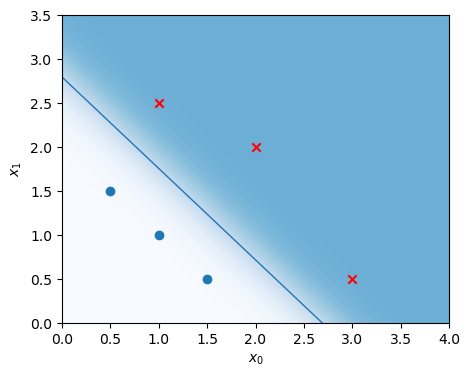

In [16]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

x_ = np.linspace(0, 4, 100)
y_ = np.linspace(0, 3.5, 100)
x, y = np.meshgrid(x_, y_)
z = simulation_cost_function(x, y, w_out, b_out)
ax.contourf(x, y, z, cmap="Blues", levels=100, vmax = 2)

ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
ax.scatter(np.transpose(X_tmp)[0][:3], np.transpose(X_tmp)[1][:3], marker = 'o', label="y=1")
ax.scatter(np.transpose(X_tmp)[0][3:], np.transpose(X_tmp)[1][3:], marker = 'x', c='r', label = "y=0")

x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], lw=1)

plt.show()